In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import subject_DM
import helpers
import numpy as np
import collections

Loaded entropies from file (S=15000, entropy_bins=50)!
Loaded dot-level measures from file (S=2000, Smin=20)!


# Checking correlation between possible regressors

<IPython.core.display.Javascript object>


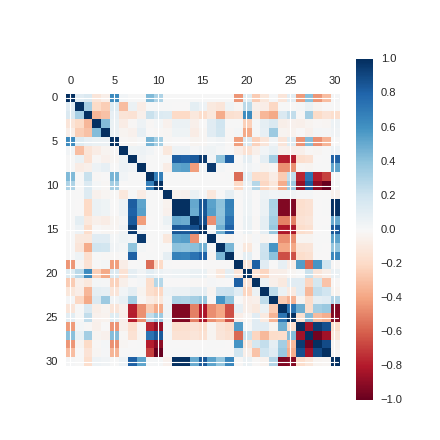

0                      correct
1                           RT
2                      entropy
3                   is_correct
4             is_correct_ideal
5                     response
6                   trial_time
7                  abs_dot_x_5
8                  abs_dot_y_5
9              correct_ideal_5
10                     dot_x_5
11                     dot_y_5
12        momentary_surprise_5
13    momentary_surprise_pc1_5
14    momentary_surprise_pc2_5
15      momentary_surprise_x_5
16      momentary_surprise_y_5
17           support_correct_5
18    support_previous_ideal_5
19                     accev_5
20               accev_cflip_5
21                 accev_pca_5
22                accsur_pca_5
23               dot_x_cflip_5
24               loglik_left_5
25              loglik_right_5
26              logpost_left_5
27             logpost_right_5
28                       lpr_5
29           m_evidence_left_5
30                  surprise_5
dtype: object

In [2]:
subjects = 2
dots = 5

DM = subject_DM.get_trial_DM(dots, subjects, r_names='all')
img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % subjects)
pd.Series(DM.columns)

<IPython.core.display.Javascript object>


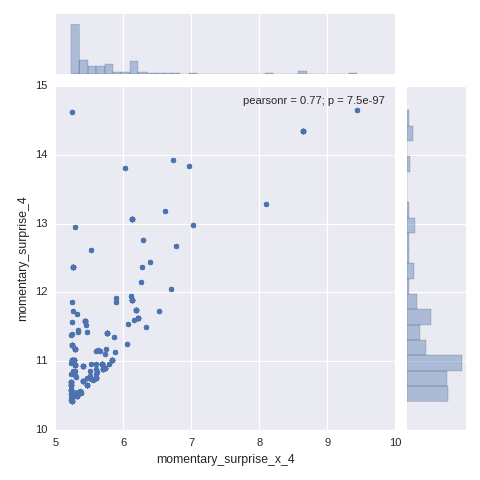

In [16]:
sns.jointplot('momentary_surprise_x_4', 'momentary_surprise_4', data=DM);

<IPython.core.display.Javascript object>


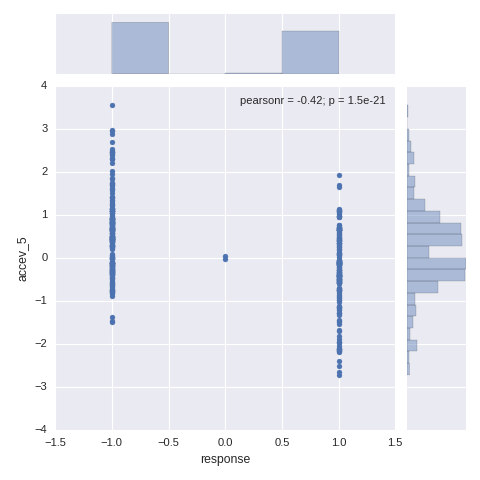

In [3]:
sns.jointplot('response', 'accev_5', data=DM);

## Selection of regressors with low correlations

<IPython.core.display.Javascript object>


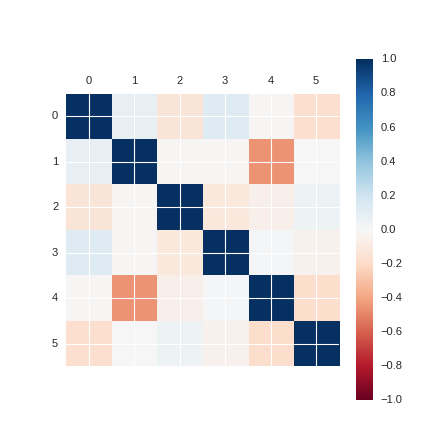

0           entropy
1          response
2        trial_time
3           dot_y_5
4    logpost_left_5
5        surprise_5
dtype: object

In [4]:
DM_lowr = subject_DM.get_trial_DM(dots, subjects, r_names=
        ['dot_y', 'surprise', 'logpost_left', 'entropy', 'trial_time', 'response'])
img = sns.plt.matshow(DM_lowr.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % subjects)
pd.Series(DM_lowr.columns)

### Checking correlation of these regressors across all subjects

In [6]:
DM_all = subject_DM.get_trial_DM(dots, r_names=
        ['dot_y', 'surprise', 'dot_x', 'entropy', 'trial_time'])
corrs = pd.concat([DM_all.loc[sub].corr() for sub in DM_all.index.levels[0]],
                  keys=DM_all.index.levels[0], names=['subject', 'regressor'])
corrs[corrs==1.] = np.nan
corrs.describe()

,entropy,trial_time,dot_x_5,dot_y_5,surprise_5
count,144.000000,144.000000,1.440000e+02,1.440000e+02,144.000000
mean,-0.012520,0.001189,-9.365512e-03,2.410197e-02,-0.043264
std,0.123560,0.047295,7.263361e-02,6.709792e-02,0.070965
min,-0.424242,-0.154099,-4.242416e-01,-1.079362e-01,-0.227120
25%,-0.101209,-0.025479,-1.519696e-02,-2.699053e-02,-0.056457
50%,-0.000813,0.004865,7.695095e-18,7.695095e-18,-0.032030
75%,0.096518,0.031884,1.253729e-02,6.783512e-02,0.002832
max,0.234290,0.107995,2.342896e-01,1.987541e-01,0.107995


<IPython.core.display.Javascript object>


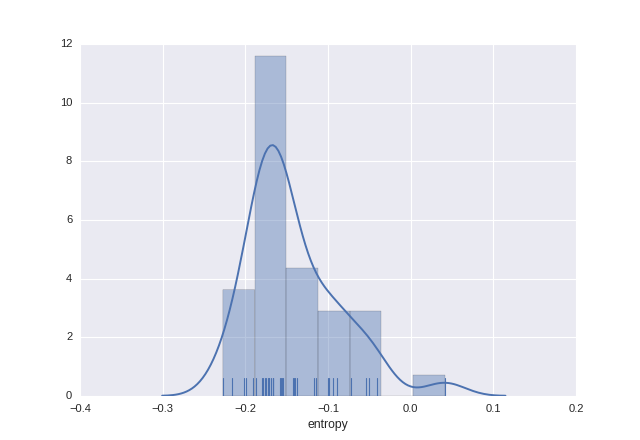

/home/bitzer/programs/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [7]:
sns.plt.figure()
sns.distplot(corrs.xs('surprise_5', level='regressor').entropy, rug=True);

## Checking correlations across dots

<IPython.core.display.Javascript object>


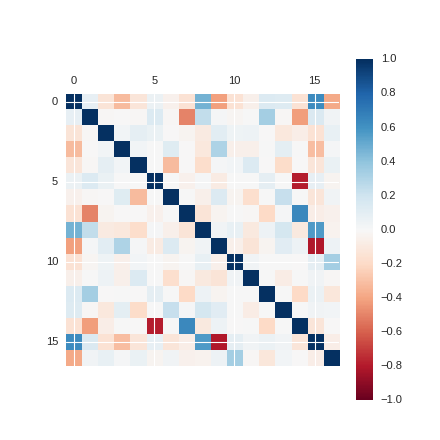

0           entropy
1          response
2        trial_time
3       abs_dot_x_4
4       abs_dot_y_4
5           dot_x_4
6           dot_y_4
7           accev_4
8     accev_cflip_4
9     dot_x_cflip_4
10      abs_dot_x_5
11      abs_dot_y_5
12          dot_x_5
13          dot_y_5
14          accev_5
15    accev_cflip_5
16    dot_x_cflip_5
dtype: object

In [13]:
sub = 2
DM = subject_DM.get_trial_DM(dots=[4,5], subjects=sub, r_names=['dot_y', 
            'dot_x', 'accev', 'abs_dot_y', 'abs_dot_x', 'entropy', 'trial_time', 'response', 'dot_x_cflip', 'accev_cflip'])

img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)

### for all subjects

In [8]:
corrs = pd.concat([DM.loc[sub].corr() for sub in DM.index.levels[0]],
                  keys=DM.index.levels[0], names=['subject', 'regressor'])
corrs[corrs==1.] = np.nan
print('overall min=%5.2f, max=%5.2f' % (corrs.min().min(), corrs.max().max()))
corrs.describe()

overall min=-0.35, max= 0.30


,entropy,trial_time,abs_dot_x_1,abs_dot_y_1,dot_x_1,dot_y_1,abs_dot_x_2,abs_dot_y_2,dot_x_2,dot_y_2,...,dot_x_3,dot_y_3,abs_dot_x_4,abs_dot_y_4,dot_x_4,dot_y_4,abs_dot_x_5,abs_dot_y_5,dot_x_5,dot_y_5
count,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,...,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,-0.038322,0.019399,-2.400427e-02,3.592842e-03,1.194415e-02,-2.501099e-02,2.046808e-02,1.618733e-02,1.376859e-02,1.127895e-02,...,4.942681e-03,1.880686e-02,5.488472e-03,4.204593e-03,1.542010e-02,-2.754138e-02,-6.667178e-03,2.086518e-03,2.774660e-02,-5.819585e-03
std,0.156923,0.063498,1.326855e-01,1.179278e-01,3.671430e-02,1.181576e-01,1.435456e-01,7.976141e-02,3.617371e-02,1.028585e-01,...,4.100180e-02,1.218147e-01,1.177338e-01,1.176436e-01,2.947517e-02,1.216453e-01,5.216147e-02,1.107370e-01,5.249069e-02,1.301104e-01
min,-0.352669,-0.129165,-3.526687e-01,-2.503053e-01,-6.409052e-02,-2.545915e-01,-2.901665e-01,-1.005136e-01,-4.364428e-02,-1.513824e-01,...,-6.409052e-02,-2.550821e-01,-3.162524e-01,-3.166431e-01,-3.545179e-17,-3.166431e-01,-1.435207e-01,-2.196504e-01,-6.064485e-03,-2.545915e-01
25%,-0.129165,-0.011115,-9.017932e-02,-2.890475e-02,-4.126499e-17,-5.237129e-02,-5.435289e-02,-4.114450e-02,-7.929212e-18,-3.474890e-02,...,-4.206430e-17,-5.253853e-02,-5.181511e-02,-6.399207e-17,-2.242523e-18,-6.232843e-02,-3.474890e-02,-5.461977e-02,-1.185088e-17,-7.342330e-02
50%,-0.042816,0.040450,-1.628555e-17,8.595934e-18,-3.627210e-18,-2.359307e-18,-2.242523e-18,4.401606e-18,1.931669e-17,-1.850109e-17,...,-2.372523e-18,1.911684e-17,-2.327654e-18,2.032243e-02,1.911684e-17,-3.481608e-17,6.679354e-18,1.016020e-17,2.460854e-18,7.695095e-18
75%,0.073251,0.054856,3.938824e-02,9.015700e-02,7.898158e-17,4.092220e-02,1.268761e-01,7.522399e-02,8.119844e-17,4.627690e-02,...,3.130849e-17,1.377822e-01,9.587577e-02,5.991858e-02,5.609059e-03,2.419416e-02,1.017522e-02,5.130292e-02,3.811751e-17,6.447500e-02
max,0.209229,0.126876,2.347850e-01,2.092287e-01,1.260788e-01,1.832887e-01,2.520110e-01,1.714043e-01,1.335850e-01,2.210344e-01,...,1.353982e-01,2.953103e-01,2.324154e-01,1.887056e-01,9.332673e-02,2.322786e-01,9.015700e-02,2.347850e-01,1.401887e-01,2.953103e-01


### Logpost_left

<IPython.core.display.Javascript object>


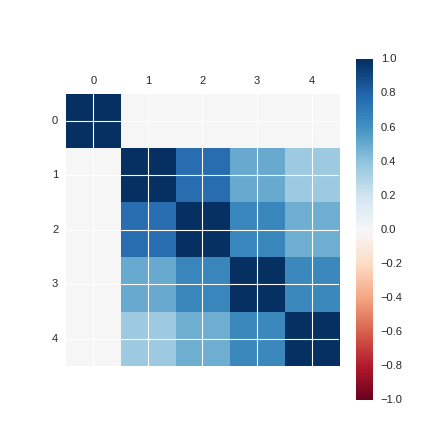

0    accev_1
1    accev_2
2    accev_3
3    accev_4
4    accev_5
dtype: object

In [6]:
DM = subject_DM.get_trial_DM(dots=np.arange(1, 6), subjects=sub, r_names=['accev'])

img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)